# Linear Regression in Python

## 2. Using telco_churn database, predict total charges

### a. Using the telco_churn database, extract a table for each customer with a 2-year contract and include the following information customer id, tenure, monthly charges, and total charges.

### b. Export the table to a csv

### c. Create a jupyter notebook titled regression

### d. Prepare the Environment (do not copy and paste...manually type so that you remember what you need and why you are importing the things that you are. You will do this often!)

In [183]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression

### e. Read the information from the customers table into a dataframe.

In [184]:
path = "./"
df_telco = pd.read_csv(path + "telco_churn_two_year.csv")


### f. How many rows are in your dataframe?
1695

### g. What is the data type of the field containing the customer ids?
object (string)

In [185]:
def df_print_meta_data(df):
    print("DATAFRAME METADATA")
    print(f"Size: {df.size}")
    print()
    print(f"Shape: {df.shape[0]} x {df.shape[1]}")
    print()
    print("Info:")
    df.info()
    print()

df_print_meta_data(df_telco)


DATAFRAME METADATA
Size: 6780

Shape: 1695 x 4

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.0+ KB



In [186]:
def df_print_peek(df):
    print("PEEK")
    df_head_tail = df.head().append(df.tail())
    print("Head and Tail:")
    print(df_head_tail)
    print()
    print("Sample (n = 10):")
    print(df.sample(n=10))
    print()

df_print_peek(df_telco)


PEEK
Head and Tail:
     customer_id  tenure  monthly_charges total_charges
0     0013-SMEOE      71           109.70       7904.25
1     0014-BMAQU      63            84.65        5377.8
2     0016-QLJIS      65            90.45        5957.9
3     0017-DINOC      54            45.20       2460.55
4     0017-IUDMW      72           116.80       8456.75
1690  9964-WBQDJ      71            24.40        1725.4
1691  9972-EWRJS      67            19.25        1372.9
1692  9975-GPKZU      46            19.75         856.5
1693  9993-LHIEB      67            67.85       4627.65
1694  9995-HOTOH      63            59.00        3707.6

Sample (n = 10):
     customer_id  tenure  monthly_charges total_charges
921   5614-DNZCE      58            64.90       3795.45
290   1820-DJFPH      72            24.05       1709.15
526   3227-WLKLI      65            91.55       5963.95
580   3518-FSTWG      72           109.55        7920.7
299   1852-QSWCD      64            24.80       1514.85
1415  8313

### h. Print to the notebook the last 10 rows of your dataframe.

In [187]:
df_telco.tail(10)


,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.3
1688,9958-MEKUC,72,103.95,7517.7
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.6


In [188]:
def df_missing_values(series):
    """
    return Series of booleans representing empty items as True
    """
    return series.str.strip() == "" if series.dtype == 'O' else pd.Series([])

print(f"tenure: {df_missing_values(df_telco.tenure).sum()}")
print(f"monthly_charges: {df_missing_values(df_telco.monthly_charges).sum()}")
print(f"total_charges: {df_missing_values(df_telco.total_charges).sum()}")


tenure: 0.0
monthly_charges: 0.0
total_charges: 10


In [189]:
def clean_df_telco(df_telco):
    return df_telco.assign(total_charges=df_telco.tenure * df_telco.monthly_charges)

df_clean = clean_df_telco(df_telco)


### i. What is the inner quartile range of tenure?
23 months

### monthly charges?
66.43

### total charges?
4750.68

In [190]:
def df_print_summary(df, columns):
    """
    columns is a sequence of columns whose IQR and range will be calculated
    """
    print("SUMMARY")
    description = df.describe()
    print("Description:")
    print(description)
    print()
    print("IQR:")
    for col in columns:
        print(f"\t{col}: {description.loc['75%', col] - description.loc['25%', col]}")
    print()
    print("Range:")
    for col in columns:
        print(f"\t{col}: {df[col].max() - df[col].min()}")
        

df_print_summary(df_clean, ("tenure", "monthly_charges", "total_charges",))

SUMMARY
Description:
            tenure  monthly_charges  total_charges
count  1695.000000      1695.000000    1695.000000
mean     56.735103        60.770413    3706.759676
std      18.209363        34.678865    2580.466562
min       0.000000        18.400000       0.000000
25%      48.000000        24.025000    1269.325000
50%      64.000000        64.350000    3604.000000
75%      71.000000        90.450000    6020.000000
max      72.000000       118.750000    8550.000000

IQR:
	tenure: 23.0
	monthly_charges: 66.42500000000001
	total_charges: 4750.675

Range:
	tenure: 72
	monthly_charges: 100.35
	total_charges: 8550.0


### j. How many missing values are in each variable?
(see above for code)

tenure: 0.0
monthly_charges: 0.0
total_charges: 10

### k. Fill any missing values with 0.
Done. See above for code.

### l. Show the distribution of monthly charges through a histogram

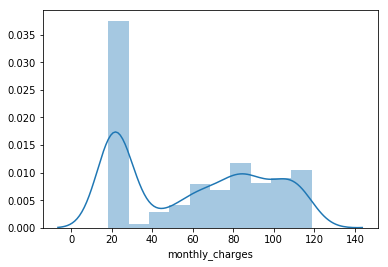

In [191]:
sns.distplot(df_clean.monthly_charges, bins=10)
plt.show()

### m. Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.

In [192]:
df_no_id = df_clean.drop(columns="customer_id")

### n. Create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

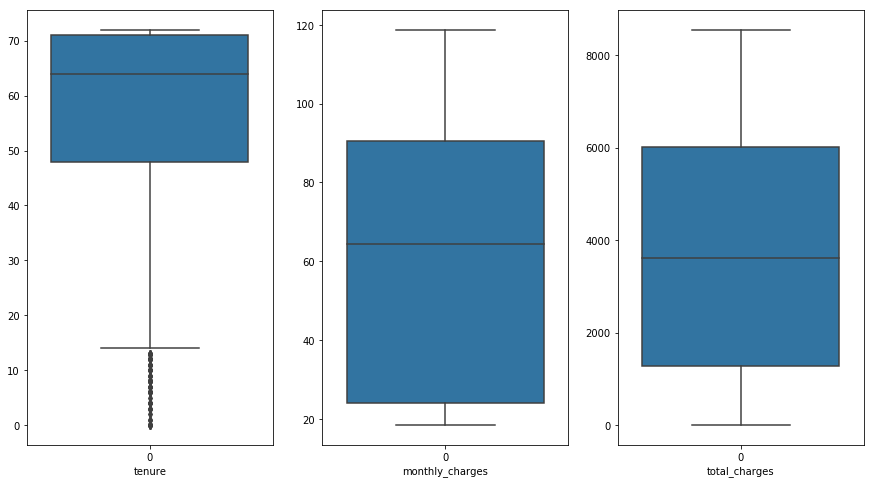

In [193]:
plt.figure(figsize=(15, 8))
plt.subplot(131)
sns.boxplot(data=df_no_id.tenure)
plt.xlabel("tenure")
plt.subplot(132)
sns.boxplot(data=df_no_id.monthly_charges)
plt.xlabel("monthly_charges")
plt.subplot(133)
sns.boxplot(data=df_no_id.total_charges)
plt.xlabel("total_charges")
plt.show()

### m. Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [194]:
def rows_are_equal(df1, df2):
    return df1.shape[0] == df2.shape[0]

def cols_are_equal(df1, df2):
    return df1.shape[1] == df2.shape[1]

def split_ratio(df, other):
    total_rows = df.shape[0] + other.shape[0]
    return df.shape[0] / total_rows

def df_split(df, X_cols, y_cols, train_size, rand_state):
    df_X = df[X_cols]
    df_y = df[y_cols]
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=train_size, random_state=rand_state)
    
    if not rows_are_equal(X_train, y_train):
        raise Exception("Rows of training dataframes do not match.")
    if not rows_are_equal(X_test, y_test):
        raise Exception("Rows of testing dataframes do not match.")
    
    df_train = pd.concat([X_train, y_train], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)
        
    if not cols_are_equal(df_train, df_test):
        raise Exception("Columns of training and testing dataframes do not match.")

    if train_size + 0.005 <= split_ratio(df_train, df_test) <= train_size - 0.005:
        raise Exception("Training-testing split is off.")
    
    return (df_train, df_test)
    
    
    
df_train, df_test = df_split(df_clean, ["tenure", "monthly_charges"], ["total_charges"], 0.8, 123)

## 3. Using the in-sample data (X_train and y_train)

### a. Create a scatterplot for each combination of variables.

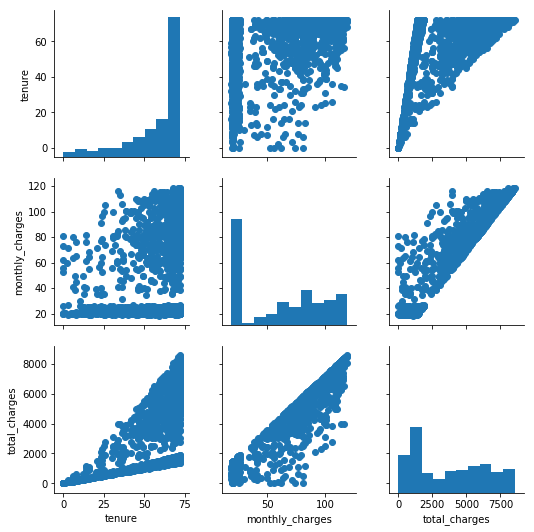

In [195]:
pg = sns.PairGrid(df_train)
pg.map_diag(plt.hist)
pg.map_offdiag(plt.scatter)
plt.show()

### b. Create a heatmap containing the 3 variables.

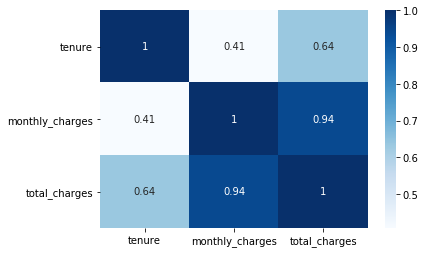

In [196]:
sns.heatmap(df_train.corr(), cmap="Blues", annot=True)
plt.show()

### c. Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"

In [197]:
column_names = df_train.columns.drop("total_charges")
r_and_p_values = {col: stats.pearsonr(df_train[col], df_train.total_charges) for col in column_names}
print("PEARSON'S R WITH total_charges")
for k, v in r_and_p_values.items():
    col = k
    r, p = v
    print(f"{col}:")
    print(f"\tPearson's R is {r:.2f} with a significance p-value of {p: .3}\n")


PEARSON'S R WITH total_charges
tenure:
	Pearson's R is 0.64 with a significance p-value of  5.42e-154

monthly_charges:
	Pearson's R is 0.94 with a significance p-value of  0.0



In [198]:
ols_model = sm.OLS(df_train.total_charges, df_train[["tenure", "monthly_charges"]])
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.700e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:56:19   Log-Likelihood:                -11131.
No. Observations:                1356   AIC:                         2.227e+04
Df Residuals:                    1354   BIC:                         2.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tenure              7.6612      0.883      8.681      0.000       5.930       9.393
monthly_charges    57.5571      0.750     76.743      0.000      56.086      59.028
==============================================================================
Omnibus:                      245.878   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.513
Skew:                          -1.004   Prob(JB):                    1.59e-123
Kurtosis:                       5.445   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### d. Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [199]:
lm_tenure = LinearRegression(fit_intercept=False)
lm_tenure.fit(df_train[["tenure"]], df_train[["total_charges"]])
print('Univariate - total_charges = b + m * tenure')
print(f'    y-intercept (b): {lm_tenure.intercept_:.2f}')
print(f'    coefficient (m): {lm_tenure.coef_[0][0]:.2f}')

Univariate - total_charges = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 67.85


### e. What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.
0. I intentionally set the y-intercept to 0, meaning a tenure of 0 months (new customer) will have 0 total_charges. 

### f. What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.
67.85. As the tenure of the customer increases by one month, the customer's total charges increases by $67.85.

### g. Write the linear function in the form of y = mx + b using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.
$total\_charges=67.85\cdot tenure + 0$

### h. Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

In [200]:
pred_train_lm_tenure = lm_tenure.predict(df_train[['tenure']])

### i. Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

In [201]:
print("MODEL EVALUATION ON TRAIN tenure v. total_charges")
meanse_lm_tenure = mean_squared_error(df_train[["total_charges"]], pred_train_lm_tenure)
print(f"\tMSE: {meanse_lm_tenure:.3f}")

medianae_lm_tenure = median_absolute_error(df_train[["total_charges"]], pred_train_lm_tenure)
print(f"\tMAE: {medianae_lm_tenure:.3f}")

r2_lm_tenure = r2_score(df_train[["total_charges"]], pred_train_lm_tenure)
print(f"\t{r2_lm_tenure:.2%} of the variance in the student's final grade can be explained by the grade on the third exam.")


MODEL EVALUATION ON TRAIN tenure v. total_charges
	MSE: 4224193.972
	MAE: 1699.205
	37.45% of the variance in the student's final grade can be explained by the grade on the third exam.


## Using the out-of-sample data (X_test, y_test)

### a. Test your model on the test sample.

In [202]:
pred_test_lm_tenure = lm_tenure.predict(df_test[['tenure']])

### b. Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [203]:
print("MODEL EVALUATION ON TEST tenure v. total_charges")
test_meanse_lm_tenure = mean_squared_error(df_test[["total_charges"]], pred_test_lm_tenure)
print(f"\tMSE: {test_meanse_lm_tenure:.3f}")

test_medianae_lm_tenure = median_absolute_error(df_test[["total_charges"]], pred_test_lm_tenure)
print(f"\tMAE: {test_medianae_lm_tenure:.3f}")

test_r2_lm_tenure = r2_score(df_test[["total_charges"]], pred_test_lm_tenure)
print(f"\t{test_r2_lm_tenure:.2%} of the variance in the student's final grade can be explained by the grade on the third exam.")


MODEL EVALUATION ON TEST tenure v. total_charges
	MSE: 3847460.857
	MAE: 1567.490
	38.48% of the variance in the student's final grade can be explained by the grade on the third exam.


### c. Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [204]:
print("P-VALUE")
train_f_vals, train_p_vals = f_regression(df_train[["tenure"]], df_train["total_charges"])
print(f"\tTrain: {train_p_vals[0]:.3}")
print()
test_f_vals, test_p_vals = f_regression(df_test[["tenure"]], df_test["total_charges"])
print(f"\tTest: {test_p_vals[0]:.3}")

P-VALUE
	Train: 5.42e-154

	Test: 2.1e-40


### d. Create a scatter plot of the predicted values versus the actual values in the test sample.

Text(0.5, 1.0, 'Actual v. Predicted total_charges')

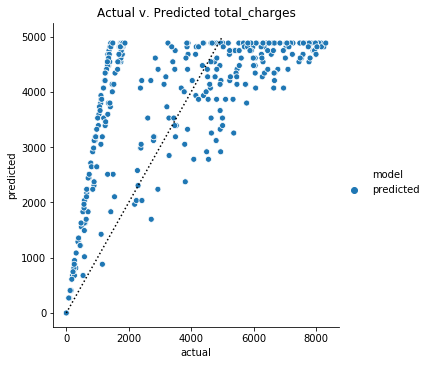

In [205]:
pd.DataFrame({'actual': df_test.total_charges,
              'predicted': pred_test_lm_tenure.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='predicted')\
    .pipe((sns.relplot, 'data'), x='actual', y='predicted', hue='model')

plt.plot([0, 5000], [0, 5000], c='black', ls=':')
plt.title('Actual v. Predicted total_charges')

### e. Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.

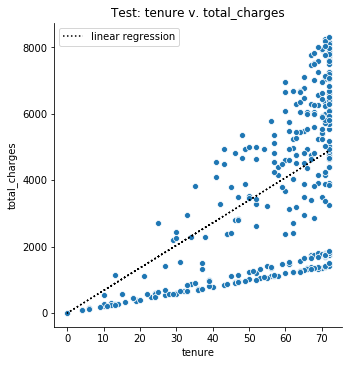

In [206]:
sns.relplot(data=df_test, x="tenure", y="total_charges")
plt.plot(df_test.tenure, pred_test_lm_tenure, ls=":", color="black", label="linear regression")
plt.title("Test: tenure v. total_charges")
plt.legend()
plt.show()


### f. Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

Text(0, 0.5, 'Residuals')

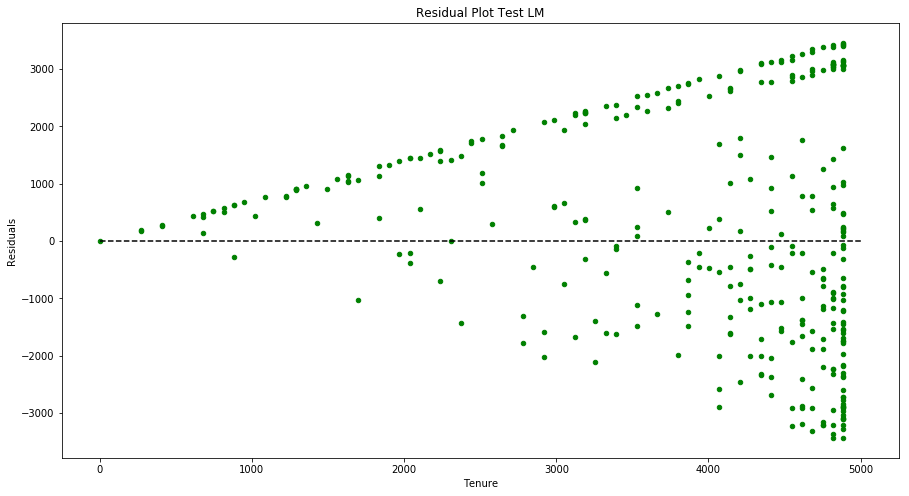

In [207]:
test_y = df_test.total_charges.ravel()
plt.figure(figsize=(15, 8))
plt.scatter(x=pred_test_lm_tenure, y=pred_test_lm_tenure - test_y.reshape(test_y.shape[0], 1), c='g', s=20)
plt.hlines(y=0, xmin=0, xmax=5000, linestyles="dashed")
plt.title("Residual Plot Test LM")
plt.xlabel("Tenure")
plt.ylabel('Residuals')